# Climate Coding Challenge

Climate change is impacting the way people live around the world

# Plot your results

## STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Boulder dataset
df = pd.read_csv("data/boulder_temp.csv", parse_dates=['DATE'])
df = df[['DATE','TMAX']].rename(columns={'TMAX':'temp_c'})
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')

# Scale if needed (tenths of °C)
if df['temp_c'].max() > 200:
    df['temp_c'] = df['temp_c'] / 10.0

df = df.dropna().copy()
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month


## STEP 1: Plot the temperature column vs time to explore the data

Plotting in Python is easy, but not quite this easy:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Boulder dataset
df = pd.read_csv("data/boulder_temp.csv", parse_dates=['DATE'])
df = df[['DATE','TMAX']].rename(columns={'TMAX':'temp_c'})
df['temp_c'] = pd.to_numeric(df['temp_c'], errors='coerce')

# Scale if needed (tenths of °C)
if df['temp_c'].max() > 200:
    df['temp_c'] = df['temp_c'] / 10.0

df = df.dropna().copy()
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month


Looks like we have *both* temperature units on the same plot, and it’s
hard to see what it is because it’s missing labels!

> ****Label your plot****
>
> <figure>
> <img src="https://imgs.xkcd.com/comics/convincing.png"
> alt="Source: https://xkcd.com/833" />
> <figcaption aria-hidden="true">Source: https://xkcd.com/833</figcaption>
> </figure>
>
> Make sure each plot has:
>
> -   A title that explains where and when the data are from
> -   x- and y- axis labels with **units** where appropriate
> -   A legend where appropriate

When plotting in Python, you’ll always need to add some instructions on
labels and how you want your plot to look.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot your data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Change <code>dataframe</code> to <strong>your</strong>
<code>DataFrame</code> name.</li>
<li>Change <code>y=</code> to the name of your
<strong>temperature</strong> column name.</li>
<li>Use the <code>title</code>, <code>ylabel</code>, and
<code>xlabel</code> parameters to add key text to your plot.</li>
<li>Adjust the size of your figure using <code>figsize=(x,y)</code>
where <code>x</code> is figure width and <code>y</code> is figure
height</li>
</ol></div></div>

> **Tip**
>
> Labels have to be a *type* in Python called a **string**. You can make
> a string by putting quotes around your label, just like the column
> names in the sample code (eg `y='temperature'`).

<Axes: title={'center': 'Daily Max Temperature in Boulder'}, xlabel='Date', ylabel='Temperature (°C)'>

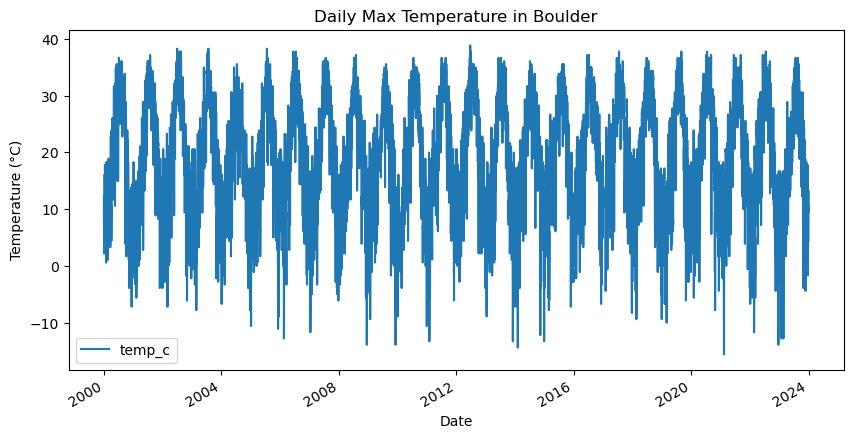

In [7]:
# Plot the temperature column vs time
df.plot(
    x='DATE',
    y='temp_c',
    figsize=(10,5),
    title="Daily Max Temperature in Boulder",
    xlabel="Date",
    ylabel="Temperature (°C)"
)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>There are many other things you can do to customize your plot. Take a
look at the <a
href="https://pandas.pydata.org/docs/user_guide/visualization.html">pandas
plotting galleries</a> and the <a
href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">documentation
of plot</a> to see if there’s other changes you want to make to your
plot. Some possibilities include:</p>
<ul>
<li>Remove the legend since there’s only one data series</li>
<li>Increase the figure size</li>
<li>Increase the font size</li>
<li>Change the colors</li>
<li>Use a bar graph instead (usually we use lines for time series, but
since this is annual it could go either way)</li>
<li>Add a trend line</li>
</ul>
<p>Not sure how to do any of these? Try searching the internet, or
asking an AI!</p></div></div>

## STEP 2: Clean up time series plots by resampling

You may notice that your plot looks a little “fuzzy”. This happens when
Python is trying to plot a value for every date, but the resolution of
the image is too low to actually do that. You can address this issue by
**resampling** the data, or summarizing it over a time period of your
choice. In this case, we will resample annually, giving us one data
point per year.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Resample</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Set the frequency of your final data by replacing
<code>DT_OFFSET</code>with a <strong>Datetime Offset Code</strong>.
Check out the table in the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects">pandas
datetime documentation</a> to find the one you want (we recommend the
start of the year).</li>
<li>Choose how to summarize each year of data by replacing
<code>agg_method_here</code> with a method that will calculate the
<strong>average annual value</strong>. Check out the <a
href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#basics">pandas
resampling documentation</a> for a list of common built-in options.</li>
<li>Add descriptive comments to the code so the next person reading it
knows what it is doing.</li>
</ol></div></div>

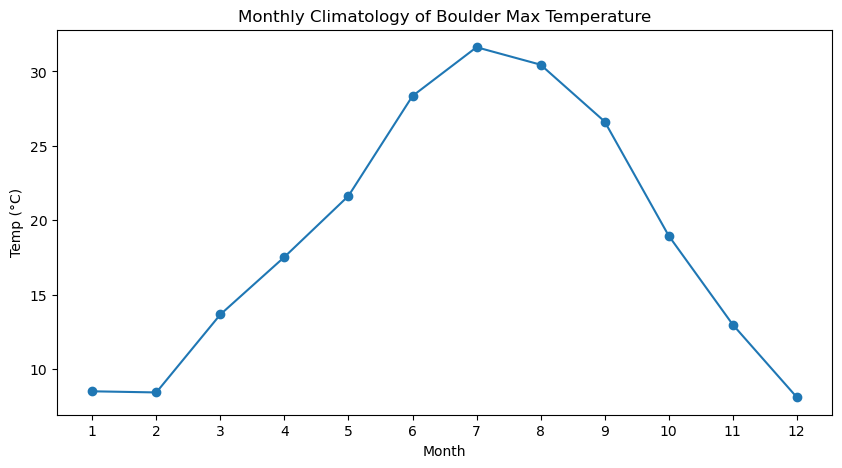

In [8]:
monthly = df.groupby('Month', as_index=False)['temp_c'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly['Month'], monthly['temp_c'], marker='o')
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Temp (°C)")
plt.title("Monthly Climatology of Boulder Max Temperature")
plt.show()


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot Annual Data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Try plotting your new DataFrame in the cell below. Can you see what
is going on more clearly now? Don’t forget to adjust your labels!</li>
<li>If you write your code on one line, it will most likely be to long
to read without scrolling. Make sure you are following <a
href="https://peps.python.org/pep-0008/">PEP-8 style guidelines</a> by
keeping your lines less than 80 characters long. If you are working in
GitHub Codespaces, we have set you up with a vertical guide that is
between 79 and 80 characters – make sure your code doesn’t go past
it!</li>
<li>PEP-8 also suggests aligning any function parameters that are too
long. See some examples below for what to do and what not to do.</li>
</ol></div></div>

> **PEP-8 tips!**
>
> Following the [PEP-8 style guide](https://peps.python.org/pep-0008/)
> is important because it makes your code easy for you and other
> collaborators to read. When you are splitting function calls across
> multiple lines, your code should look like this:
>
> ``` python
> my_dataframe.plot(
>     y='column_name',
>     title=f'My Fantastic Plot',
>     xlabel='The x Axis',
>     ylabel='The y Axis'
> )
> ```
>
> or maybe this:
>
> ``` python
> my_dataframe.plot(y='column_name',
>                   title=f'My Fantastic Plot',
>                   xlabel='The x Axis',
>                   ylabel='The y Axis')
> ```

> **Warning**
>
> Try to avoid these [PEP-8](https://peps.python.org/pep-0008/)
> violations:
>
> ``` python
> my_dataframe.plot(y='column_name', title=f'My Fantastic Plot', xlabel='The x Axis', ylabel='The y Axis')
> ```
>
> or
>
> ``` python
> my_dataframe.plot(
>     y='column_name',
>       title=f'My Fantastic Plot',
>    xlabel='The x Axis',
>    ylabel='The y Axis'
> )
> ```
>
> or
>
> ``` python
> my_dataframe.plot(y='column_name',
>     title=f'My Fantastic Plot',
>     xlabel='The x Axis',
>     ylabel='The y Axis'
> )
> ```

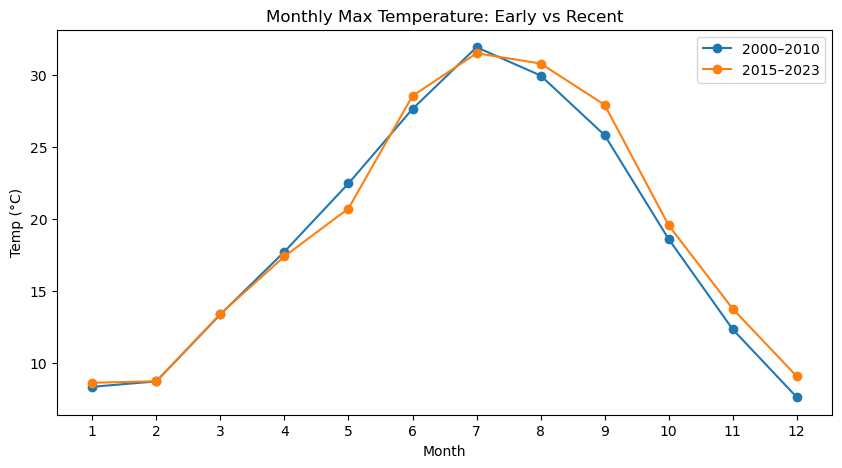

In [9]:
# Early: 2000–2010
early = df[df['Year'] <= 2010].groupby('Month', as_index=False)['temp_c'].mean()

# Recent: 2015–2023
recent = df[df['Year'] >= 2015].groupby('Month', as_index=False)['temp_c'].mean()

plt.figure(figsize=(10,5))
plt.plot(early['Month'], early['temp_c'], marker='o', label="2000–2010")
plt.plot(recent['Month'], recent['temp_c'], marker='o', label="2015–2023")
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Temp (°C)")
plt.title("Monthly Max Temperature: Early vs Recent")
plt.legend()
plt.show()


For Part 4, I examined Boulder’s seasonal cycle. The monthly climatology shows the typical cold winters and hot summers. Comparing early (2000–2010) with recent years (2015–2023), the recent period is slightly warmer in summer months, showing how seasonal averages can highlight long-term shifts.


In [10]:
%store var1 var2

UsageError: Unknown variable 'var1'


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!